In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('model_dataset.xlsx')

In [3]:
df = df.dropna()

In [4]:
df[['shell_color','model', 'time_description']] = df[['shell_color','model', 'time_description']].apply(lambda x: pd.factorize(x)[0])
df['hour'] = df['end_time'].dt.hour
df.drop(['start_time','end_time','t_stamp','stamp_date'],inplace=True, axis=1)

# Unbalanced Dataset

In [5]:
df_blister = df[df['blister'] ==1]
df_no_blister = df[df['blister'] == 0]

0    99.16
1     0.84
Name: blister, dtype: float64
0    53768
1      453
Name: blister, dtype: int64


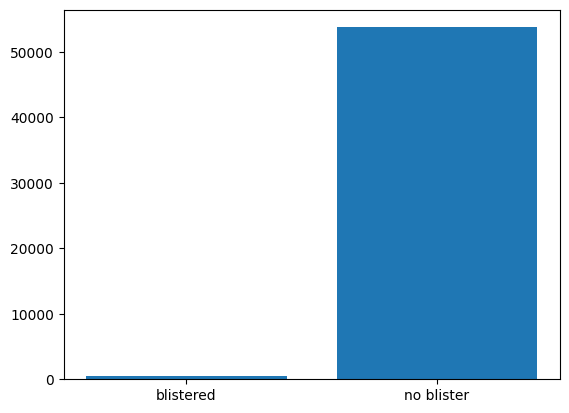

In [6]:
plt.bar(['blistered','no blister'], [df_blister.shape[0], df_no_blister.shape[0]])
print(round(df['blister'].value_counts(True)*100,2))
print(df['blister'].value_counts())

# Upsampling Minority Class

In [7]:
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [8]:
# Separate majority and minority classes
df_majority = df[df.blister==0]
df_minority = df[df.blister==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=53768,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.blister.value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int64

0    53768
1    53768
Name: blister, dtype: int64

In [9]:
df_upsampled.corr()

,serial#,blister,shell_color,model,time_description,iso_press_avg,poly_press_avg,booth,iso_lbs_run_usage,poly_lbs_run_usage,spray_time,Avg Temp,Avg Dew Point,Avg Humidity,Avg Pressure,Total Precipitation,hour
serial#,1.000000,0.270192,0.120990,0.089143,-0.160415,-0.090213,-0.267804,0.171371,0.282498,0.281405,-0.030111,0.094438,0.112761,-0.063629,-0.066649,0.012057,-0.030465
blister,0.270192,1.000000,0.197572,0.168220,-0.064900,-0.083191,-0.147616,0.035350,0.198671,0.201358,0.003737,-0.019751,-0.019060,-0.006720,-0.003113,0.007602,0.003864
shell_color,0.120990,0.197572,1.000000,0.166898,0.009893,-0.011704,-0.039055,0.041699,0.104384,0.105024,0.050163,-0.008072,-0.005886,-0.009606,-0.030855,-0.026315,0.048748
model,0.089143,0.168220,0.166898,1.000000,0.021511,-0.042044,-0.026214,0.101093,0.032453,0.033421,0.066254,-0.015436,0.020886,0.029954,0.048987,-0.035396,0.065418
time_description,-0.160415,-0.064900,0.009893,0.021511,1.000000,0.045806,0.105878,-0.027514,-0.034233,-0.034122,-0.167095,0.056947,0.025496,-0.064543,-0.040066,-0.023260,-0.166325
iso_press_avg,-0.090213,-0.083191,-0.011704,-0.042044,0.045806,1.000000,0.796786,0.054272,-0.077325,-0.079941,-0.050482,0.185414,0.104286,-0.206881,-0.049207,0.022126,-0.050508
poly_press_avg,-0.267804,-0.147616,-0.039055,-0.026214,0.105878,0.796786,1.000000,0.116902,-0.183712,-0.186407,-0.043724,0.186642,0.091556,-0.210889,0.004166,-0.004450,-0.042593
booth,0.171371,0.035350,0.041699,0.101093,-0.027514,0.054272,0.116902,1.000000,0.057292,0.058340,-0.020588,0.003096,-0.033831,-0.032149,-0.000803,0.007063,-0.018539
iso_lbs_run_usage,0.282498,0.198671,0.104384,0.032453,-0.034233,-0.077325,-0.183712,0.057292,1.000000,0.999166,-0.015163,-0.309401,-0.329522,0.109921,0.008417,0.001996,-0.014318
poly_lbs_run_usage,0.281405,0.201358,0.105024,0.033421,-0.034122,-0.079941,-0.186407,0.058340,0.999166,1.000000,-0.014885,-0.308905,-0.329589,0.108713,0.006110,0.002490,-0.014041


In [10]:
y = df_upsampled.blister
X = df_upsampled[['model','shell_color','time_description','poly_press_avg','booth','poly_lbs_run_usage','Avg Temp']]

In [11]:
# Train model
clf_1 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_1 = clf_1.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_1 ) )
# [0 1]
 
# How's our accuracy?
print(accuracy_score(y, pred_y_1) )


[0 1]
0.6485828001785449


# Using Support Vector Machine

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [13]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
classifier.fit(X , y)

SVC(probability=True, random_state=0)

In [14]:
y_pred = classifier.predict(X)
y_pred_proba = classifier.predict_proba(X)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y, y_pred)
print(cm)
accuracy_score(y,y_pred)

[[42222 11546]
 [ 7176 46592]]


0.8259001636661211